In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_df = pd.read_csv('proba.csv')
results_df['ggo_percent'] = results_df['ggo_vol']/results_df['lung_vol']
results_df['cons_percent'] = results_df['cons_vol']/results_df['lung_vol']
results_df['summa'] = results_df['ggo_percent'] + results_df['cons_percent']
results_df.head()

,path,label,lung_vol,ggo_vol,cons_vol,ggo_percent,cons_percent,summa
0,'0268.nii.gz',0,2499153.1,41799.849,400067.520,0.016726,0.160081,0.176807
1,'0198.nii.gz',0,1188326.2,1063.226,35347.008,0.000895,0.029745,0.030640
2,'0262.nii.gz',0,1305979.0,1110.034,22552.065,0.000850,0.017268,0.018118
3,'0185.nii.gz',1,980707.9,1292.190,55350.546,0.001318,0.056439,0.057757
4,'0262.nii.gz',0,1305979.0,99162.351,194310.716,0.075930,0.148785,0.224715


In [3]:
results_df['summa'].std()

0.04084429581290353

In [7]:
ones = results_df.loc[(results_df["label"] == 1)]

In [8]:
ones[['summa']].std()

summa    0.049064
dtype: float64

In [9]:
zeros = results_df.loc[(results_df["label"] == 0)]

In [10]:
zeros[['summa']].std()

summa    0.035927
dtype: float64

In [39]:
zeros[['ggo_percent', 'cons_percent']].mean()

ggo_percent     0.069035
cons_percent    0.132767
dtype: float64

In [40]:
zeros[['ggo_percent', 'cons_percent']].std()

ggo_percent     0.016626
cons_percent    0.020609
dtype: float64

In [11]:
loc = zeros['ggo_percent'].mean()
scale = zeros['ggo_percent'].std()

In [12]:
loc1 = ones['ggo_percent'].mean()
scale1 = ones['ggo_percent'].std()

In [13]:
value = np.random.normal(loc=loc,scale=scale,size=1000)
value1 = np.random.normal(loc=loc1,scale=scale1,size=1000)

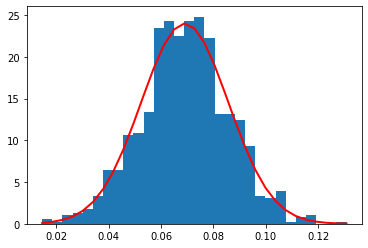

In [14]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(value, 30, density=True)
plt.plot(bins, 1/(scale * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - loc)**2 / (2 * scale**2) ),
         linewidth=2, color='r')

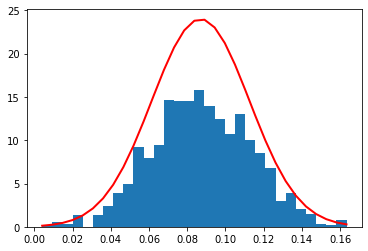

In [15]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(value1, 30, density=True)
plt.plot(bins, 1/(scale * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - loc1)**2 / (2 * scale1**2) ),
         linewidth=2, color='r')

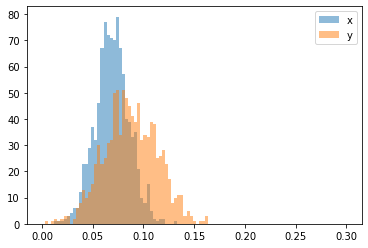

In [18]:
bins = np.linspace(-0.0, 0.3, 100)

plt.hist(value, bins, alpha=0.5, label='x')
plt.hist(value1, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()